In [4]:
# A1
import pandas as pd
import numpy as np      
def load_excel():
    columns=['Customer','Candies (#)','Mangoes (Kg)', 'Milk Packets (#)','Payment (Rs)']
    df = pd.read_excel("C:\\Users\\everybody\\Downloads\\Lab Session Data.xlsx",usecols=columns)
    return df
 
def convert_to_matrices(df):
    df_numerical = df.select_dtypes(include='number')
    df1 = df_numerical[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
    df2 = df_numerical[['Payment (Rs)']]
    m1 = df1.values
    m2 = df2.values
    return m1,m2

def dimensionality(matrix):
    return matrix.shape[1]
    
def rank(matrix):
    return np.linalg.matrix_rank(matrix)

def finding_variables(matrix1,matrix2):
    matrix_inv = np.linalg.pinv(matrix1)
    return np.dot(matrix_inv,matrix2)


In [5]:
# A1
def main():
    # loading excel sheet into notebook
    df = load_excel()
    print(df.head())
    # generating the matrices
    A,C = convert_to_matrices(df)
    #finding dimensionality of the matrix
    dimension = dimensionality(A)
    print(f"The dimensionality of the vector space is {dimension}")
    #finding the rank of the matrix
    A_rank = rank(A)
    print(f"The rank of Matrix A is {A_rank}")
    # finding the values of the variables
    variable_matrix = finding_variables(A,C)
    print(f"The values of the first second and third variables are:{variable_matrix[0]},{variable_matrix[1]},{variable_matrix[2]}")

if __name__ == "__main__":
    main()

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
The dimensionality of the vector space is 3
The rank of Matrix A is 3
The values of the first second and third variables are:[1.],[55.],[18.]


In [6]:
#A3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# classifying as rich or poor
def classifying(df):
    df['Status'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
    return df
    
def train_evaluate_classifier(data, feature_columns, class_column):
    X = data[feature_columns]
    Y = data[class_column]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=37)
    model = LogisticRegression()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)
    return accuracy, report

    
      




In [7]:
import pandas as pd
def main():
    df = load_excel()
    # classifying as rich or poor
    df = classifying(df)
    feature_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
    class_column = 'Status'
    accuracy, report = train_evaluate_classifier(df, feature_columns, class_column)
    print(f"accuracy: {accuracy}, report: {report}")
    
if __name__ == "__main__":
    main()

accuracy: 0.8, report:               precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [31]:
#A4
import pandas as pd
import statistics
def load_excel(filepath,columns,sheetindex):
    df = pd.read_excel(filepath,usecols=columns,sheet_name=sheetindex)
    return df
def mean(df):
    return statistics.mean(df['Price'])

def variance(df):
    return df['Price'].var()
def sample_mean_day(df):
    mean = df[df['Day'] == 'Wed']['Price'].mean()
    return mean
def sample_mean_month(df):
    return df[df['Month'] == 'Apr']['Price'].mean()
def prob_loss(df):
    df['losses'] = df['Chg%'].apply(lambda x: 1 if x < 0 else 0)
    return df['losses'].mean()
def wed_prob_profit(df):
    df['profit'] = df[df['Day'] == 'Wed']['Chg%'].apply(lambda x: 1 if x > 0 else 0)
    return df['profit'].mean()
def conditional_prob(df):
    df['Date'] = pd.to_datetime(df['Date'])
    is_wednesday = df['Date'].dt.day_name() == 'Wednesday'
    is_profit = df['Chg%'] > 0
    profitable_wednesdays = df[is_wednesday & is_profit].shape[0]
    total_wednesdays = df[is_wednesday].shape[0]
    conditional_probability = profitable_wednesdays / total_wednesdays if total_wednesdays > 0 else 0
    return conditional_probability
def scatter(df):
    df.plot(x='Day', y='Chg%', kind='scatter')

    
    
    

           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  
The mean of the price column is 1560.663453815261
The variance of the price column is 58732.36535253922
The sample mean on wednesdays is 1550.7060000000001
The sample mean in the month of April is 1698.9526315789474
The probability of a loss is 0.4979919678714859
The probability of making a profit on wednesdays is 0.42
The conditional probability is 0.42


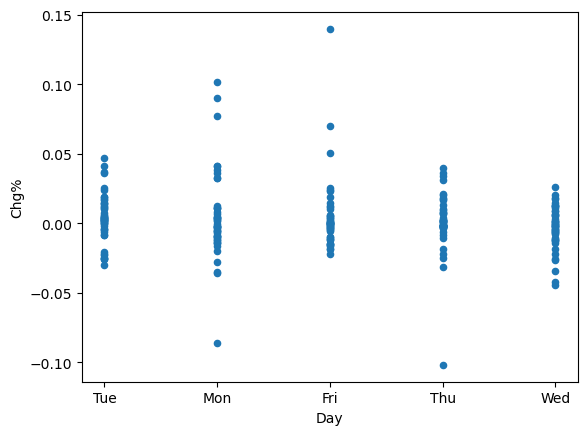

In [33]:
def main():
    filepath = "C:\\Users\\everybody\\Amrita University\\sem 5\\Machine learning\\Lab Session Data.xlsx"
    cols = ['Date','Month','Day','Price','Open','High','Low','Volume','Chg%']
    df = load_excel(filepath,cols,1)
    print(df.head())
    # finding the mean
    print(f"The mean of the price column is {mean(df)}")
    #finding the variance of the price column
    print(f"The variance of the price column is {variance(df)}")

    # finding the mean for columns for price where the day is wednesday
    print(f"The sample mean on wednesdays is {sample_mean_day(df)}")

    #finding the sample mean for price columns whose month is April
    print(f"The sample mean in the month of April is {sample_mean_month(df)}")

    #finding the probability of loss
    print(f"The probability of a loss is {prob_loss(df)}")
    # finding the probaility of making a profit on wednesdays
    print(f"The probability of making a profit on wednesdays is {wed_prob_profit(df)}")
    # the conditional probability of making a profit given the fact its a wednesday
    print(f"The conditional probability is {conditional_prob(df)}")

    # scatter plot
    scatter(df)
    
    
    
    

if __name__ == "__main__":
    main()

In [9]:
"""
A5 Data Visualization
"""
#data visualization
#loading the data
import pandas as pd
thyroid_data = pd.read_excel("C:\\Users\\everybody\\Downloads\\Lab Session Data.xlsx",sheet_name=2,na_values='?')
thyroid_data


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64.0,t,0.83,t,77.0,f,NaN,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91.0,t,0.92,t,99.0,f,NaN,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113.0,t,1.27,t,89.0,f,NaN,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75.0,t,0.85,t,88.0,f,NaN,other,NO CONDITION


In [13]:
# checking the data types for all columns
thyroid_data.dtypes

categorical_columns = thyroid_data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"Column '{col}' unique values:\n{thyroid_data[col].unique()}\n")

Column 'sex' unique values:
['F' 'M' nan]

Column 'on thyroxine' unique values:
['f' 't']

Column 'query on thyroxine' unique values:
['f' 't']

Column 'on antithyroid medication' unique values:
['f' 't']

Column 'sick' unique values:
['f' 't']

Column 'pregnant' unique values:
['f' 't']

Column 'thyroid surgery' unique values:
['f' 't']

Column 'I131 treatment' unique values:
['f' 't']

Column 'query hypothyroid' unique values:
['t' 'f']

Column 'query hyperthyroid' unique values:
['f' 't']

Column 'lithium' unique values:
['f' 't']

Column 'goitre' unique values:
['f' 't']

Column 'tumor' unique values:
['f' 't']

Column 'hypopituitary' unique values:
['f' 't']

Column 'psych' unique values:
['f' 't']

Column 'TSH measured' unique values:
['t' 'f']

Column 'T3 measured' unique values:
['f' 't']

Column 'TT4 measured' unique values:
['f' 't']

Column 'T4U measured' unique values:
['f' 't']

Column 'FTI measured' unique values:
['f' 't']

Column 'TBG measured' unique values:
['f' 't']


In [18]:
#finding range of numeric values: getting all the numeric columns
thyroid_data_numeric = thyroid_data.select_dtypes(include=['int64', 'float64'])
thyroid_data_numeric.max() - thyroid_data_numeric.min()

Record ID    2.931802e+07
age          6.552500e+04
TSH          5.299950e+02
T3           1.795000e+01
TT4          5.980000e+02
T4U          2.160000e+00
FTI          8.796000e+02
TBG          1.999000e+02
dtype: float64

In [19]:
#presence of missinf values in the dataset
thyroid_data.isnull().sum()

Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral sourc

In [69]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
#making columns numeric
for column in thyroid_data_numeric.columns:
    thyroid_data_numeric[column] = pd.to_numeric(thyroid_data_numeric[column], errors='coerce')




In [61]:

#calculating the mean and standard deviation of the data
print(f" The mean for numeric columns is: {thyroid_data_numeric.mean()}")
print(f"The standard deviation for numeric columns is {thyroid_data_numeric.std()}")

 The mean for numeric columns is: age     73.555822
TSH      5.218403
T3       1.970629
TT4    108.700305
T4U      0.976056
FTI    113.640746
TBG     29.870057
dtype: float64
The standard deviation for numeric columns is age    1183.976718
TSH      24.184006
T3        0.887579
TT4      37.522670
T4U       0.200360
FTI      41.551650
TBG      21.080504
dtype: float64


In [72]:
# Imputation
for column in thyroid_data_numeric.columns:
    thyroid_data_numeric[column] = pd.to_numeric(thyroid_data_numeric[column], errors='coerce')
    
    # Detect outliers
    outliers = detect_outliers_iqr(thyroid_data_numeric[column])
    
    if outliers.any():  # If any outliers are present
        median_value = thyroid_data_numeric[column].median()
        thyroid_data_numeric[column].fillna(median_value,inplace=True)
    else:
        mean_value = thyroid_data_numeric[column].mean()
        thyroid_data_numeric[column].fillna(mean_value,inplace=True)

age    0
TSH    0
T3     0
TT4    0
T4U    0
FTI    0
TBG    0
dtype: int64

In [94]:
#adding the record ID to merge datasets later on
thyroid_data_numeric['Record ID'] = thyroid_data['Record ID']
thyroid_data_numeric

#extracting non numeric data
thyroid_data_non_numeric = thyroid_data.select_dtypes(exclude=['number'])
thyroid_data_non_numeric['Record ID'] = thyroid_data['Record ID']
thyroid_data_non_numeric

#checking for null values
thyroid_data_non_numeric.isnull().sum()

#finding replacing null values with the mode of each class
for column in thyroid_data_non_numeric.columns:
    mode_value = thyroid_data_non_numeric[column].mode()[0]
    thyroid_data_non_numeric[column].fillna(mode_value, inplace=True) 
print(thyroid_data_numeric)
print(thyroid_data_non_numeric)

           age       TSH        T3       TT4       T4U       FTI       TBG  \
0     0.000427  0.000557  0.103064  0.170569  0.365741  0.122328  0.129565   
1     0.000427  0.003009  0.103064  0.210702  0.365741  0.122328  0.129565   
2     0.000610  0.002632  0.103064  0.170569  0.365741  0.122328  0.054527   
3     0.000534  0.002632  0.103064  0.170569  0.365741  0.122328  0.129565   
4     0.000473  0.002632  0.103064  0.170569  0.365741  0.122328  0.179590   
...        ...       ...       ...       ...       ...       ...       ...   
9167  0.000839  0.002632  0.103064  0.103679  0.305556  0.085948  0.129565   
9168  0.000320  0.002632  0.103064  0.148829  0.347222  0.110960  0.129565   
9169  0.001038  0.002632  0.103064  0.185619  0.509259  0.099591  0.129565   
9170  0.000702  0.002632  0.103064  0.122074  0.314815  0.098454  0.129565   
9171  0.000458  0.002632  0.103064  0.107023  0.393519  0.072306  0.129565   

      Record ID  
0     840801013  
1     840801014  
2     840

In [97]:

#normalizing values
thyroid_data_numeric = (thyroid_data_numeric - thyroid_data_numeric.min())/(thyroid_data_numeric.max() - thyroid_data_numeric.min())
thyroid_data_numeric['Record ID'] = thyroid_data['Record ID']
thyroid_data_numeric

,age,TSH,T3,TT4,T4U,FTI,TBG,Record ID
0,0.000427,0.000557,0.103064,0.170569,0.365741,0.122328,0.129565,840801013
1,0.000427,0.003009,0.103064,0.210702,0.365741,0.122328,0.129565,840801014
2,0.000610,0.002632,0.103064,0.170569,0.365741,0.122328,0.054527,840801042
3,0.000534,0.002632,0.103064,0.170569,0.365741,0.122328,0.129565,840803046
4,0.000473,0.002632,0.103064,0.170569,0.365741,0.122328,0.179590,840803047
...,...,...,...,...,...,...,...,...
9167,0.000839,0.002632,0.103064,0.103679,0.305556,0.085948,0.129565,870119022
9168,0.000320,0.002632,0.103064,0.148829,0.347222,0.110960,0.129565,870119023
9169,0.001038,0.002632,0.103064,0.185619,0.509259,0.099591,0.129565,870119025
9170,0.000702,0.002632,0.103064,0.122074,0.314815,0.098454,0.129565,870119027


In [101]:
#merging datasets
thyroid_data = pd.merge(thyroid_data_numeric, thyroid_data_non_numeric,on='Record ID',how='left')
thyroid_data


,age,TSH,T3,TT4,T4U,FTI,TBG,Record ID,sex,on thyroxine,...,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,Condition
0,0.000427,0.000557,0.103064,0.170569,0.365741,0.122328,0.129565,840801013,F,f,...,f,f,t,f,f,f,f,f,other,NO CONDITION
1,0.000427,0.003009,0.103064,0.210702,0.365741,0.122328,0.129565,840801014,F,f,...,f,f,t,t,t,f,f,f,other,NO CONDITION
2,0.000610,0.002632,0.103064,0.170569,0.365741,0.122328,0.054527,840801042,F,f,...,f,f,f,f,f,f,f,t,other,NO CONDITION
3,0.000534,0.002632,0.103064,0.170569,0.365741,0.122328,0.129565,840803046,F,f,...,f,f,f,f,f,f,f,t,other,NO CONDITION
4,0.000473,0.002632,0.103064,0.170569,0.365741,0.122328,0.179590,840803047,F,f,...,f,f,f,f,f,f,f,t,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,0.000839,0.002632,0.103064,0.103679,0.305556,0.085948,0.129565,870119022,M,f,...,f,f,f,f,t,t,t,f,SVI,NO CONDITION
9168,0.000320,0.002632,0.103064,0.148829,0.347222,0.110960,0.129565,870119023,M,f,...,f,f,f,f,t,t,t,f,SVI,NO CONDITION
9169,0.001038,0.002632,0.103064,0.185619,0.509259,0.099591,0.129565,870119025,M,f,...,f,f,f,f,t,t,t,f,SVI,I
9170,0.000702,0.002632,0.103064,0.122074,0.314815,0.098454,0.129565,870119027,F,f,...,f,f,f,f,t,t,t,f,other,NO CONDITION


In [102]:
"""
Similarity
"""
import pandas as pd
#taking a fraction of the dataset
binary_cols = ['on thyroxine', 'TSH measured', 'T3 measured', 'hypopituitary', 'psych']  # Adjust based on actual binary columns

# Get the first two observation vectors
vector1 = thyroid_data.loc[0, binary_cols].replace({'t': 1, 'f': 0}).astype(int)
vector2 = thyroid_data.loc[1, binary_cols].replace({'t': 1, 'f': 0}).astype(int)

# Calculate f11, f10, f01, and f00
f11 = sum((vector1 == 1) & (vector2 == 1))  # Both vectors have 1
f10 = sum((vector1 == 1) & (vector2 == 0))  # Vector1 is 1, Vector2 is 0
f01 = sum((vector1 == 0) & (vector2 == 1))  # Vector1 is 0, Vector2 is 1
f00 = sum((vector1 == 0) & (vector2 == 0))  # Both vectors have 0

# Calculate JC and SMC
jc = f11 / (f01 + f10 + f11)
smc = (f11 + f00) / (f00 + f01 + f10 + f11)
print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

Jaccard Coefficient (JC): 0.5
Simple Matching Coefficient (SMC): 0.8


In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load your thyroid dataset (replace with your actual path)
# thyroid_data = pd.read_excel('path_to_thyroid_data.xlsx')

# Step 1: Identify numeric and categorical columns
numeric_cols = thyroid_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = thyroid_data.select_dtypes(include=['object']).columns.tolist()

# Step 2: Apply One-Hot Encoding for categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = pd.DataFrame(encoder.fit_transform(thyroid_data[categorical_cols]))

# Step 3: Combine the encoded categorical data and numeric data
encoded_categorical.columns = encoder.get_feature_names_out(categorical_cols)
thyroid_data_encoded = pd.concat([thyroid_data[numeric_cols], encoded_categorical], axis=1)

# Step 4: Extract the complete feature vectors (all attributes) for the first two observations
vector1 = thyroid_data_encoded.iloc[0].values  # First observation (all attributes)
vector2 = thyroid_data_encoded.iloc[1].values  # Second observation (all attributes)

# Step 5: Calculate the dot product of the two vectors
dot_product = np.dot(vector1, vector2)

# Step 6: Calculate the magnitudes of each vector
magnitude1 = np.linalg.norm(vector1)
magnitude2 = np.linalg.norm(vector2)

# Step 7: Calculate the Cosine Similarity
cosine_similarity = dot_product / (magnitude1 * magnitude2)

# Print the result
print(f"Cosine Similarity between the first two observations: {cosine_similarity}")

Cosine Similarity between the first two observations: 1.0


C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


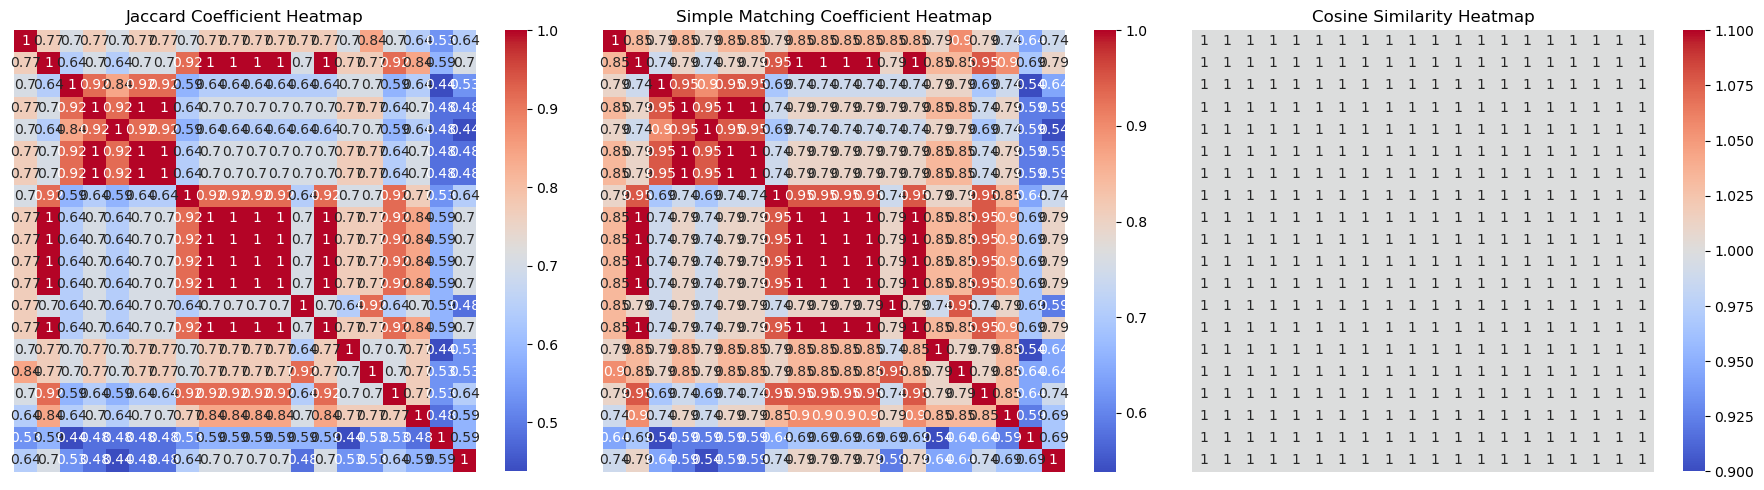

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset (replace with your actual path)
# thyroid_data = pd.read_excel('path_to_thyroid_data.xlsx')

# Step 1: Extract the first 20 observation vectors (all attributes)
first_20_vectors = thyroid_data.iloc[:20]

# Ensure categorical columns are encoded to binary/numeric form
categorical_cols = first_20_vectors.select_dtypes(include=['object']).columns.tolist()
numeric_cols = first_20_vectors.select_dtypes(include=[np.number]).columns.tolist()

# One-Hot Encode the categorical columns
encoded_categorical = pd.get_dummies(first_20_vectors[categorical_cols])

# Combine with numeric data
first_20_vectors_encoded = pd.concat([first_20_vectors[numeric_cols], encoded_categorical], axis=1)

# Initialize matrices to store JC, SMC, and COS values
num_vectors = first_20_vectors_encoded.shape[0]
jc_matrix = np.zeros((num_vectors, num_vectors))
smc_matrix = np.zeros((num_vectors, num_vectors))
cos_matrix = np.zeros((num_vectors, num_vectors))

# Step 2: Define functions for JC and SMC calculations
def jaccard_similarity(v1, v2):
    f11 = sum((v1 == 1) & (v2 == 1))
    f10 = sum((v1 == 1) & (v2 == 0))
    f01 = sum((v1 == 0) & (v2 == 1))
    return f11 / (f11 + f10 + f01) if (f11 + f10 + f01) > 0 else 0

def simple_matching_coefficient(v1, v2):
    f11 = sum((v1 == 1) & (v2 == 1))
    f00 = sum((v1 == 0) & (v2 == 0))
    f10 = sum((v1 == 1) & (v2 == 0))
    f01 = sum((v1 == 0) & (v2 == 1))
    return (f11 + f00) / (f11 + f00 + f10 + f01)

# Step 3: Compute pairwise JC, SMC, and COS for the first 20 vectors
for i in range(num_vectors):
    for j in range(num_vectors):
        v1 = first_20_vectors_encoded.iloc[i].values
        v2 = first_20_vectors_encoded.iloc[j].values
        
        # Jaccard Coefficient
        jc_matrix[i, j] = jaccard_similarity(v1, v2)
        
        # Simple Matching Coefficient
        smc_matrix[i, j] = simple_matching_coefficient(v1, v2)
        
        # Cosine Similarity
        cos_matrix[i, j] = cosine_similarity([v1], [v2])[0][0]

# Step 4: Create heatmaps for JC, SMC, and COS
plt.figure(figsize=(18, 5))

# Jaccard Coefficient Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Jaccard Coefficient Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Simple Matching Coefficient Heatmap')

# Cosine Similarity Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Heatmap')

# Show the plots
plt.tight_layout()
plt.show()